<a href="https://colab.research.google.com/github/rinelise/lightning-nox/blob/main/nn_flashfreq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import keras
import sklearn
#import lightningutil
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install cartopy #for lightningutil

In [3]:
import sys
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/colab')
# Import the module
import lightningutil

## preprocess - check out the raw data



checking out the raw data

In [4]:
ds_glm = xr.open_dataset('/content/drive/My Drive/colab/GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc')
ds_geos_cape = xr.open_dataset('/content/drive/My Drive/colab/GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc')
ds_geos_precon = xr.open_dataset('/content/drive/My Drive/colab/GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc')
ds_geos_cldht = xr.open_dataset('/content/drive/My Drive/colab/GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N.nc')

In [75]:
ds_glm

<xarray.Dataset>
Dimensions:    (Longitudes: 300, Latitudes: 200, Hours: 24, Days: 31)
Dimensions without coordinates: Longitudes, Latitudes, Hours, Days
Data variables:
    longitude  (Longitudes) float32 ...
    latitude   (Latitudes) float32 ...
    time       (Hours) float32 ...
    flashes    (Days, Hours, Latitudes, Longitudes) float32 ...

In [76]:
ds_geos_cape

<xarray.Dataset>
Dimensions:    (Longitudes: 300, Latitudes: 200, Hours: 24, Days: 31)
Dimensions without coordinates: Longitudes, Latitudes, Hours, Days
Data variables:
    longitude  (Longitudes) float32 ...
    latitude   (Latitudes) float32 ...
    time       (Hours) float32 ...
    cape       (Days, Hours, Latitudes, Longitudes) float32 ...

In [77]:
ds_geos_precon

<xarray.Dataset>
Dimensions:    (Longitudes: 300, Latitudes: 200, Hours: 24, Days: 31)
Dimensions without coordinates: Longitudes, Latitudes, Hours, Days
Data variables:
    longitude  (Longitudes) float32 ...
    latitude   (Latitudes) float32 ...
    time       (Hours) float32 ...
    precon     (Days, Hours, Latitudes, Longitudes) float32 ...

In [78]:
ds_geos_cldht

<xarray.Dataset>
Dimensions:    (Longitudes: 300, Latitudes: 200, Hours: 24, Days: 31)
Dimensions without coordinates: Longitudes, Latitudes, Hours, Days
Data variables:
    longitude  (Longitudes) float32 ...
    latitude   (Latitudes) float32 ...
    time       (Hours) float32 ...
    cldht      (Days, Hours, Latitudes, Longitudes) float32 ...

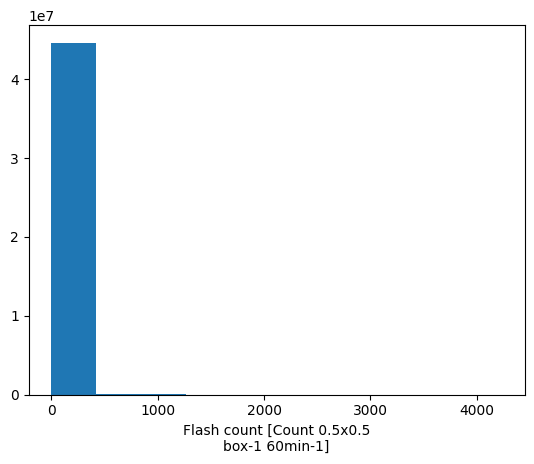

In [80]:
ds_glm.flashes.plot()
plt.show()

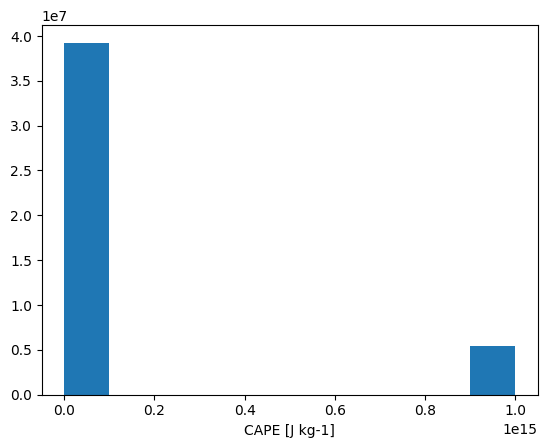

In [81]:
ds_geos_cape.cape.plot()
plt.show()

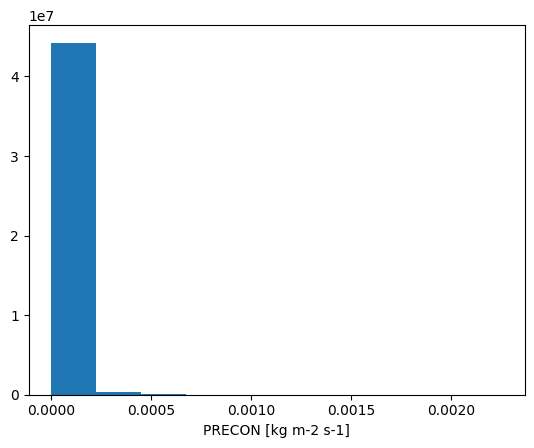

In [82]:
ds_geos_precon.precon.plot()
plt.show()

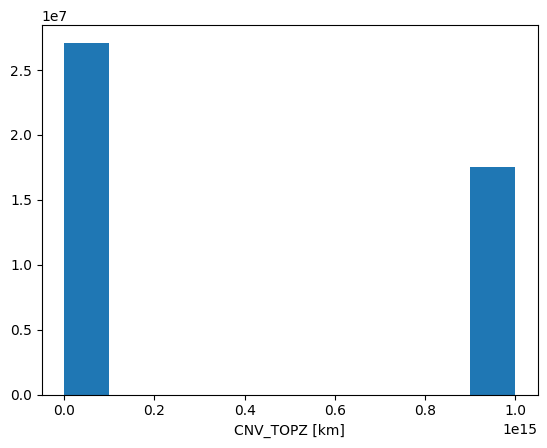

In [83]:
ds_geos_cldht.cldht.plot()
plt.show()

# preprocess datetime thru lightningutil, select sample, and/or stack

##glm

In [5]:
#stack glm data

#lightningutil preprocessing stuff
directory = '/content/drive/My Drive/colab/'
filename = 'GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc'

# open and preprocess coordinates
ds_glm = lightningutil.open_and_preprocess(directory+filename,lightningutil.variables)

In [6]:
#select range of lats/lons

ds_glm = ds_glm.sel(Latitudes=slice(35, 45), Longitudes=slice(-105,-90))

In [7]:
ds_glm.shape

(20, 30, 744)

In [166]:
#ds_glm_datetime = ds_glm.stack(point=("Longitudes","Latitudes","Datetime")).Datetime.values

In [8]:
# reshape into 1D array // select sample

ds_glm_v2 = ds_glm.stack(point=("Longitudes","Latitudes","Datetime")).values  #need this when selecting a range of lat/lons
#ds_glm_v2 = ds_glm.sel(Latitudes=35.25, Longitudes=-90.25).values  #single sample test

In [9]:
ds_glm_v2.shape

(446400,)

In [13]:
ds_glm_v2

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [171]:
#ds_glm_datetime.shape

(446400,)

In [172]:
#ds_glm_datetime

array(['2019-07-01T01:00:00.000000000', '2019-07-01T02:00:00.000000000',
       '2019-07-01T03:00:00.000000000', ...,
       '2019-07-31T22:00:00.000000000', '2019-07-31T23:00:00.000000000',
       '2019-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

##cape



In [10]:
#stack geos data

#lightningutil preprocessing stuff
directory = '/content/drive/My Drive/colab/'
filename = 'GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc'

# open and preprocess coordinates
ds_geos_cape = lightningutil.open_and_preprocess(directory+filename,lightningutil.variables)

In [11]:
#select range of lats/lons

ds_geos_cape = ds_geos_cape.sel(Latitudes=slice(35, 45), Longitudes=slice(-105,-90)) #Datetime=slice(2019-07-13T12:00:00.000000000,2019-07-13T23:00:00.000000000))

In [12]:
ds_geos_cape.shape

(20, 30, 744)

In [13]:
# reshape into 1D array // select sample

ds_geos_cape_v2 = ds_geos_cape.stack(point=("Longitudes","Latitudes","Datetime")).values
#ds_geos_v2 = ds_geos.sel(Latitudes=35.25, Longitudes=-90.25).values
#ds_geos_v2 = ds_geos.sel(Latitudes=46.25, Longitudes=-100.25).values

In [14]:
ds_geos_cape_v2.shape #needs to be the same as glm_v2

(446400,)

##precon


In [15]:
#stack geos data

#lightningutil preprocessing stuff
directory = '/content/drive/My Drive/colab/'
filename = 'GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc'

# open and preprocess coordinates
ds_geos_precon = lightningutil.open_and_preprocess(directory+filename,lightningutil.variables)

In [16]:
ds_geos_precon = ds_geos_precon.sel(Latitudes=slice(35, 45), Longitudes=slice(-105,-90))

In [17]:
ds_geos_precon.shape

(20, 30, 744)

In [18]:
# reshape into 1D array // select sample

ds_geos_precon_v2 = ds_geos_precon.stack(point=("Longitudes","Latitudes","Datetime")).values

In [19]:
ds_geos_precon_v2.shape

(446400,)

##cldht


In [20]:
#stack geos data

#lightningutil preprocessing stuff
directory = '/content/drive/My Drive/colab/'
filename = 'GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N.nc'

# open and preprocess coordinates
ds_geos_cldht = lightningutil.open_and_preprocess(directory+filename,lightningutil.variables)

In [21]:
ds_geos_cldht = ds_geos_cldht.sel(Latitudes=slice(35, 45), Longitudes=slice(-105,-90))

In [22]:
ds_geos_cldht.shape

(20, 30, 744)

In [23]:
# reshape into 1D array // select sample

ds_geos_cldht_v2 = ds_geos_cldht.stack(point=("Longitudes","Latitudes","Datetime")).values

In [24]:
ds_geos_cldht_v2.shape

(446400,)

## drop nans, zeroes, and mask data

mask by glm

In [25]:
# mask nans out by glm

ds_geos_cldht_v2 = ds_geos_cldht_v2[~np.isnan(ds_glm_v2)] #mask cldht by glm
ds_geos_precon_v2 = ds_geos_precon_v2[~np.isnan(ds_glm_v2)] #mask precon by glm
ds_geos_cape_v2 = ds_geos_cape_v2[~np.isnan(ds_glm_v2)] #masking cape by glm
#ds_glm_datetime = ds_glm_datetime[~np.isnan(ds_glm_v2)] #masking datetime by glm
ds_glm_v2 = ds_glm_v2[~np.isnan(ds_glm_v2)] #msking glm by glm

In [26]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(446400,) (446400,) (446400,) (446400,)


In [27]:
# get rid of zeroes masked by glm > 0
ds_geos_cldht_v2 = ds_geos_cldht_v2[ds_glm_v2>0.] #masking cldht by glm >0
ds_geos_precon_v2 = ds_geos_precon_v2[ds_glm_v2>0.] #masking precon by glm >0
ds_geos_cape_v2 = ds_geos_cape_v2[ds_glm_v2>0.] #masking geos cape by glm >0
#ds_glm_datetime = ds_glm_datetime[ds_glm_v2>0.] #masking datetime
ds_glm_v2 = ds_glm_v2[ds_glm_v2>0.] #masking glm by glm >0

In [28]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(30445,) (30445,) (30445,) (30445,)


In [ ]:
ds.

mask by cape

In [29]:
# mask nans out by geos cape

ds_geos_cldht_v2 = ds_geos_cldht_v2[~np.isnan(ds_geos_cape_v2)] #mask cldht by cape
ds_glm_v2 = ds_glm_v2[~np.isnan(ds_geos_cape_v2)] #masking glm by geos cape
ds_geos_precon_v2 = ds_geos_precon_v2[~np.isnan(ds_geos_cape_v2)] #masking precon by cape
#ds_glm_datetime = ds_glm_datetime[~np.isnan(ds_geos_cape_v2)] #masking datetime
ds_geos_cape_v2 = ds_geos_cape_v2[~np.isnan(ds_geos_cape_v2)] #masking geos cape by geos cape

In [30]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(28896,) (28896,) (28896,) (28896,)


In [31]:
# get rid of zeroes masked by cape > 0

ds_geos_cldht_v2 = ds_geos_cldht_v2[ds_geos_cape_v2>0.] #mask cldht by cape >0
ds_geos_precon_v2 = ds_geos_precon_v2[ds_geos_cape_v2>0.] #mask preco by cape >0
ds_glm_v2 = ds_glm_v2[ds_geos_cape_v2>0.] #masking glm by geos cape >0
#ds_glm_datetime = ds_glm_datetime[ds_geos_cape_v2>0.] #masking datetime
ds_geos_cape_v2 = ds_geos_cape_v2[ds_geos_cape_v2>0.] #masking geos cape by geos cape >0

In [32]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(28896,) (28896,) (28896,) (28896,)


mask by precon

In [33]:
# mask nans out by precon

ds_geos_cldht_v2 = ds_geos_cldht_v2[~np.isnan(ds_geos_precon_v2)] #mask cldht by precon
ds_glm_v2 = ds_glm_v2[~np.isnan(ds_geos_precon_v2)] #masking glm by geos precon
ds_geos_cape_v2 = ds_geos_cape_v2[~np.isnan(ds_geos_precon_v2)] #masking geos cape by geos precon
#ds_glm_datetime = ds_glm_datetime[~np.isnan(ds_geos_precon_v2)] #masking datetime
ds_geos_precon_v2 = ds_geos_precon_v2[~np.isnan(ds_geos_precon_v2)] #mask precon by precon

In [34]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(28896,) (28896,) (28896,) (28896,)


In [35]:
#get rid of zeroes masked by precon > 0

ds_geos_cldht_v2 = ds_geos_cldht_v2[ds_geos_precon_v2>0.] #mask cldht by precon
ds_glm_v2 = ds_glm_v2[ds_geos_precon_v2>0.] #masking glm by geos precon >0
ds_geos_cape_v2 = ds_geos_cape_v2[ds_geos_precon_v2>0.] #masking geos cape by geos precon >0
#ds_glm_datetime = ds_glm_datetime[ds_geos_precon_v2>0.] #masking datetime
ds_geos_precon_v2 = ds_geos_precon_v2[ds_geos_precon_v2>0.] #mask precon by precon >0

In [36]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(25960,) (25960,) (25960,) (25960,)


mask by cldht

In [37]:
#mask nans by cldht

ds_glm_v2 = ds_glm_v2[~np.isnan(ds_geos_cldht_v2)] #masking glm by geos cldht
ds_geos_cape_v2 = ds_geos_cape_v2[~np.isnan(ds_geos_cldht_v2)] #masking geos cape by geos cldht
ds_geos_precon_v2 = ds_geos_precon_v2[~np.isnan(ds_geos_cldht_v2)] #mask precon by cldht
#ds_glm_datetime = ds_glm_datetime[~np.isnan(ds_geos_cldht_v2)] #masking datetime
ds_geos_cldht_v2 = ds_geos_cldht_v2[~np.isnan(ds_geos_cldht_v2)] #mask cldht by cldht

In [38]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(25960,) (25960,) (25960,) (25960,)


In [39]:
#mask by cldht >0

ds_glm_v2 = ds_glm_v2[ds_geos_cldht_v2>0.] #masking glm by geos precon >0
ds_geos_cape_v2 = ds_geos_cape_v2[ds_geos_cldht_v2>0.] #masking geos cape by geos precon >0
ds_geos_precon_v2 = ds_geos_precon_v2[ds_geos_cldht_v2>0.] #mask precon by precon >0
#ds_glm_datetime = ds_glm_datetime[ds_geos_cldht_v2>0.] #masking datetime
ds_geos_cldht_v2 = ds_geos_cldht_v2[ds_geos_cldht_v2>0.] #mask cldht by cldht >0

In [40]:
print(ds_geos_cape_v2.shape, ds_geos_precon_v2.shape, ds_glm_v2.shape, ds_geos_cldht_v2.shape) # ds_glm_datetime.shape,

(25960,) (25960,) (25960,) (25960,)


## look at correlation scatter plots just for funsies

Text(0, 0.5, 'CAPE')

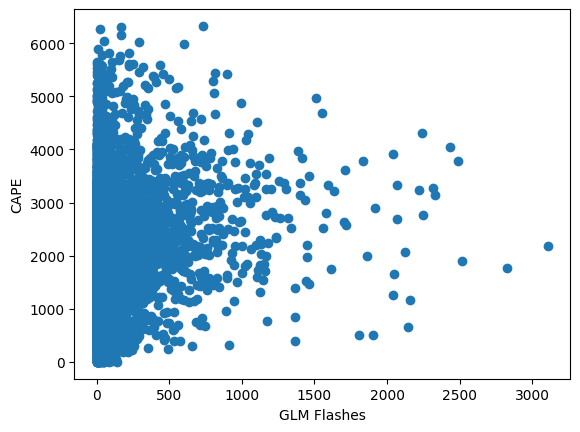

In [51]:
import matplotlib.pyplot as mp
mp.scatter(ds_glm_v2,ds_geos_cape_v2)
mp.xlabel('GLM Flashes')
mp.ylabel('CAPE')

Text(0, 0.5, 'precon')

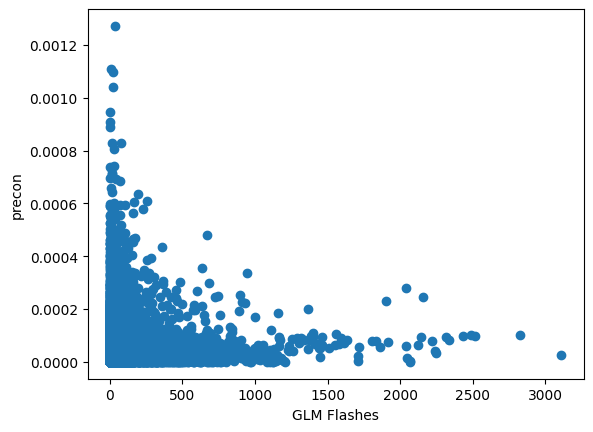

In [52]:
import matplotlib.pyplot as mp
mp.scatter(ds_glm_v2,ds_geos_precon_v2)
mp.xlabel('GLM Flashes')
mp.ylabel('precon')

Text(0, 0.5, 'cldht')

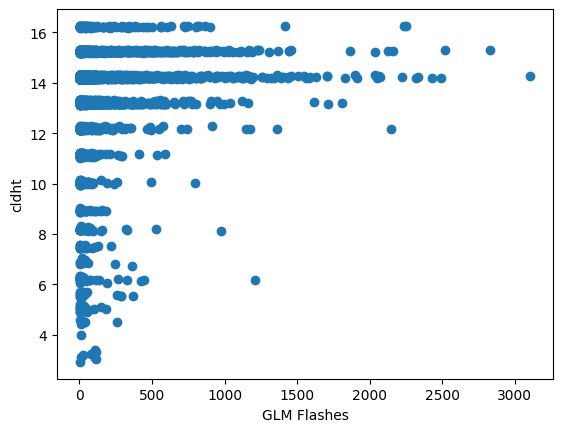

In [53]:
import matplotlib.pyplot as mp
mp.scatter(ds_glm_v2,ds_geos_cldht_v2)
mp.xlabel('GLM Flashes')
mp.ylabel('cldht')


Text(0, 0.5, 'cldht')

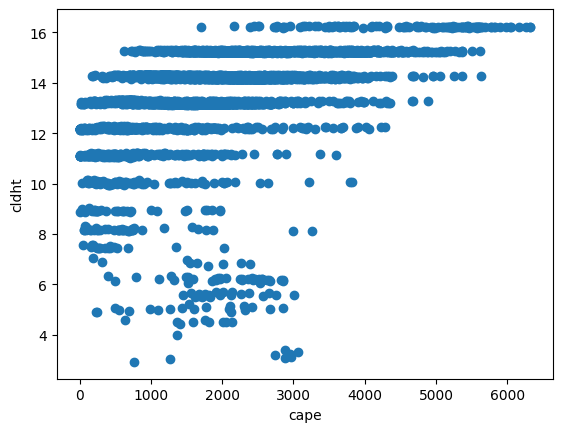

In [54]:
import matplotlib.pyplot as mp
mp.scatter(ds_geos_cape_v2,ds_geos_cldht_v2)
mp.xlabel('cape')
mp.ylabel('cldht')

Text(0, 0.5, 'precon')

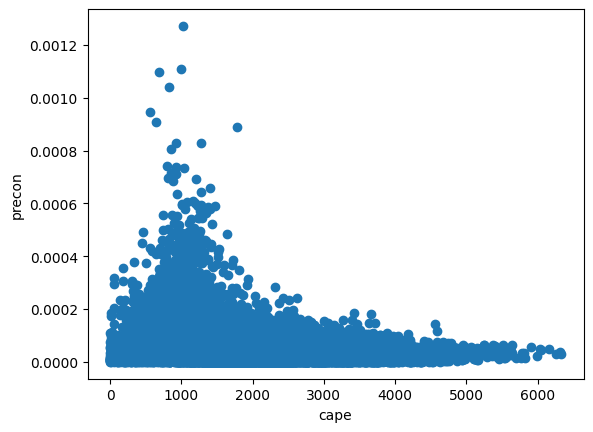

In [55]:
import matplotlib.pyplot as mp
mp.scatter(ds_geos_cape_v2,ds_geos_precon_v2)
mp.xlabel('cape')
mp.ylabel('precon')

Text(0, 0.5, 'cldht')

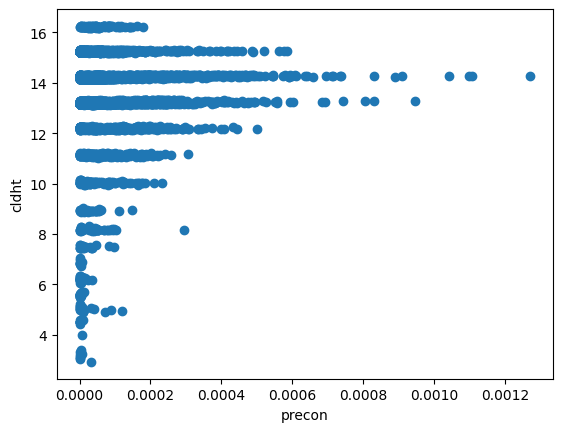

In [56]:
import matplotlib.pyplot as mp
mp.scatter(ds_geos_precon_v2,ds_geos_cldht_v2)
mp.xlabel('precon')
mp.ylabel('cldht')

## Split into x/y train/test, see what they look like


In [41]:
data_input = np.stack([ds_geos_cape_v2, ds_geos_precon_v2, ds_geos_cldht_v2], axis = 1)

In [43]:
# split dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_input,
    ds_glm_v2,
    test_size=0.3, # % of total data is test data
    shuffle=False
    )

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18172, 3) (7788, 3) (18172,) (7788,)


In [210]:
#X_datetime_test = ds_glm_datetime[18172:]

In [45]:
from scipy import stats

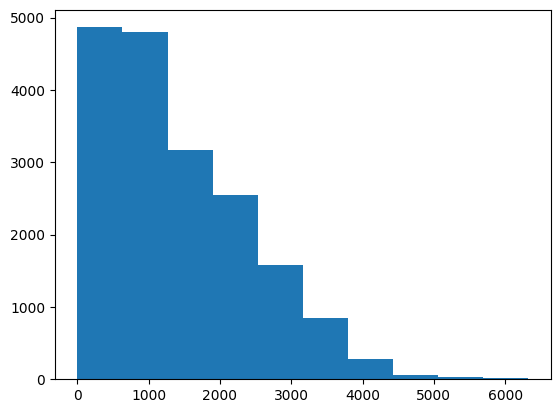

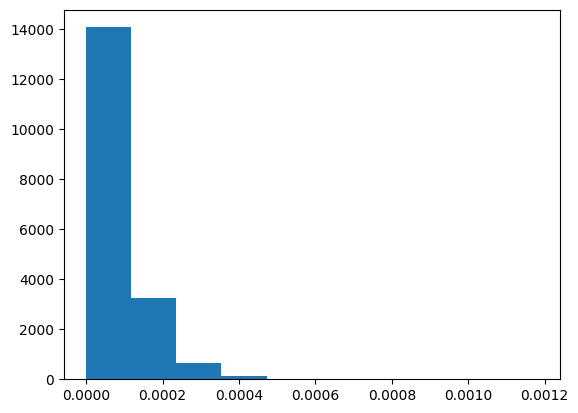

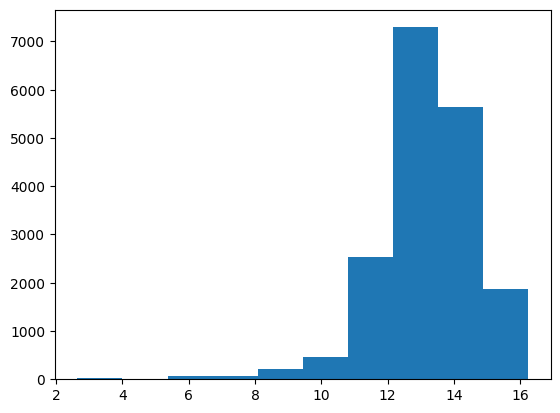

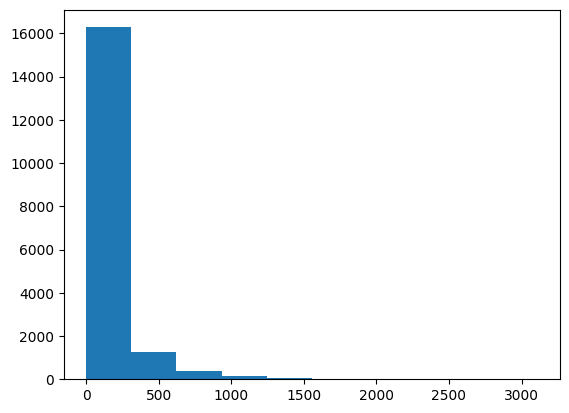

In [46]:
#plot training sets before normalization

plt.hist(X_train[:, 0])
plt.show()

plt.hist(X_train[:, 1])
plt.show()

plt.hist(X_train[:, 2])
plt.show()

plt.hist(y_train[:])
plt.show()

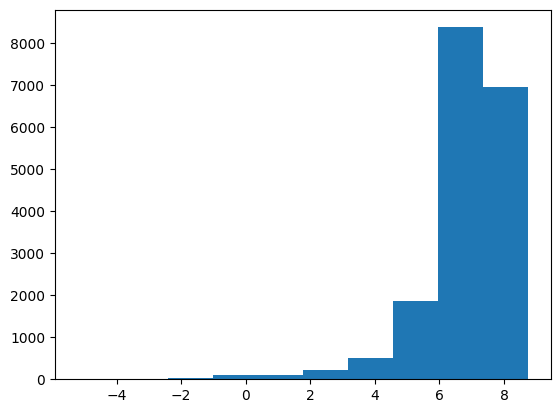

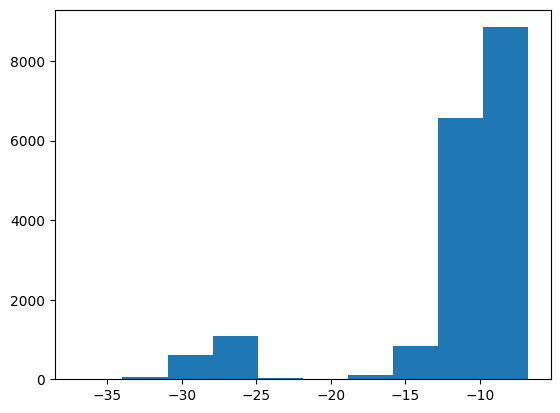

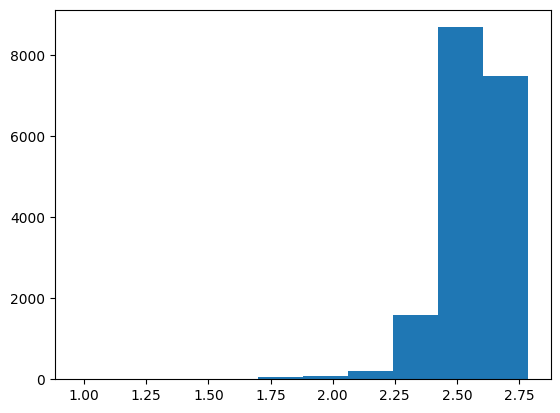

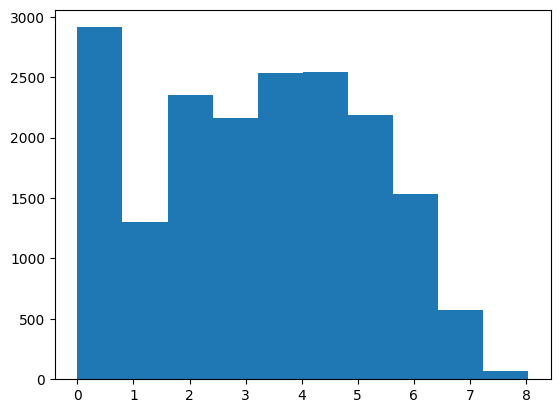

In [47]:
#plot training sets as a log function (lamda=0)

plt.hist(stats.boxcox(X_train[:,0], lmbda=0))
plt.show()

plt.hist(stats.boxcox(X_train[:,1], lmbda=0))
plt.show()

plt.hist(stats.boxcox(X_train[:,2], lmbda=0))
plt.show()

plt.hist(stats.boxcox(y_train, lmbda=0))
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
#scalerv2 = StandardScaler()

In [50]:
X_train_transformed = scaler.fit_transform(X_train)

In [51]:
print(max(scaler.fit_transform(X_train)[:,0]), min(scaler.fit_transform(X_train)[:,0]))

1.0 0.0


In [52]:
print(max(scaler.fit_transform(X_train)[:,1]), min(scaler.fit_transform(X_train)[:,1]))

1.0 0.0


In [53]:
print(max(scaler.fit_transform(X_train)[:,2]), min(scaler.fit_transform(X_train)[:,2]))

1.0 0.0


In [54]:
# input
#X_train_transformed = scaler.fit_transform(X_train.reshape(-1, 1))
X_train_transformed = np.squeeze(X_train_transformed)

# label
y_train_transformed = stats.boxcox(y_train, lmbda=0)
#y_train_transformed = scalerv2.fit_transform(y_train_transformed.reshape(-1, 1))

In [54]:
X_train_transformed.shape

(18172, 3)

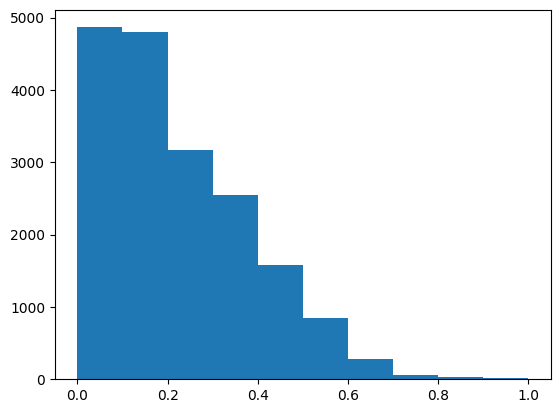

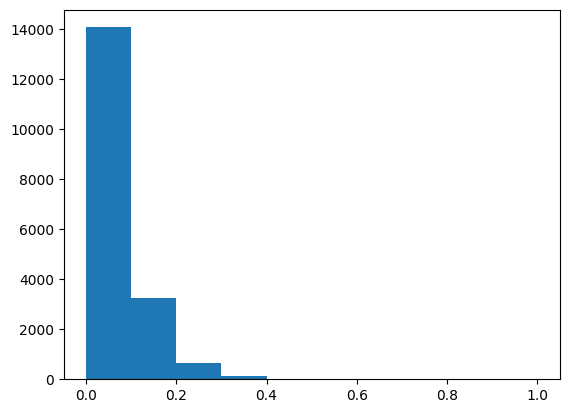

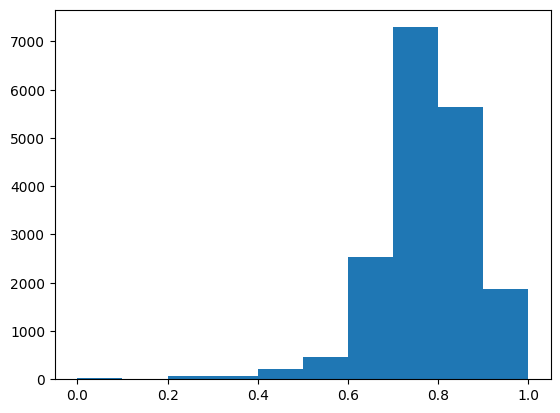

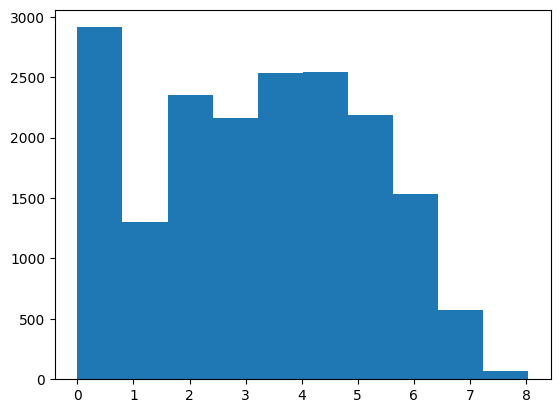

In [55]:
plt.hist(X_train_transformed[:,0])
plt.show()

plt.hist(X_train_transformed[:,1])
plt.show()

plt.hist(X_train_transformed[:,2])
plt.show()

plt.hist(y_train_transformed)
plt.show()

Now lets attempt the actual neural network


In [56]:
model = keras.Sequential() # instantiate model object

# input layer (shape of data)
model.add(
    keras.Input(shape=(3,), name="input_layer")) # update number of nodes to match number of variavles

# first dense layer
model.add(
    keras.layers.Dense(units=8, activation=keras.activations.relu))

#model.add(keras.layers.BatchNormalization())

model.add(
   keras.layers.Dense(units=8, activation=keras.activations.relu))

#model.add(keras.layers.BatchNormalization())

model.add(
   keras.layers.Dense(units=8, activation=keras.activations.relu))

#model.add(keras.layers.BatchNormalization())

##### seems to work best with two relu layer, no batch normalization #####

# output layer
model.add(
    keras.layers.Dense(units=1, activation=keras.activations.linear))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185 (740.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), ### LR = 0.01 seems to work best for single grid point #but 0.0001 works when sliced
    loss='mse'
)

In [59]:
history = model.fit(
    x=X_train_transformed,
    y=y_train_transformed,
    batch_size=64, #32 seems to work well w/single pt, 64 for sliced pts
    epochs=25,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
)

Epoch 1/25
228/228 [==============================] - 3s 7ms/step - loss: 12.6182 - val_loss: 11.3932
Epoch 2/25
228/228 [==============================] - 1s 6ms/step - loss: 10.5833 - val_loss: 9.2614
Epoch 3/25
228/228 [==============================] - 1s 6ms/step - loss: 8.4705 - val_loss: 7.1153
Epoch 4/25
228/228 [==============================] - 2s 10ms/step - loss: 6.4151 - val_loss: 5.2852
Epoch 5/25
228/228 [==============================] - 2s 8ms/step - loss: 4.8098 - val_loss: 4.2439
Epoch 6/25
228/228 [==============================] - 1s 5ms/step - loss: 3.9681 - val_loss: 3.9916
Epoch 7/25
228/228 [==============================] - 1s 4ms/step - loss: 3.7217 - val_loss: 4.0323
Epoch 8/25
228/228 [==============================] - 1s 3ms/step - loss: 3.6838 - val_loss: 4.0689
Epoch 9/25
228/228 [==============================] - 1s 3ms/step - loss: 3.6789 - val_loss: 4.0679
Epoch 10/25
228/228 [==============================] - 1s 3ms/step - loss: 3.6771 - val_loss: 4.

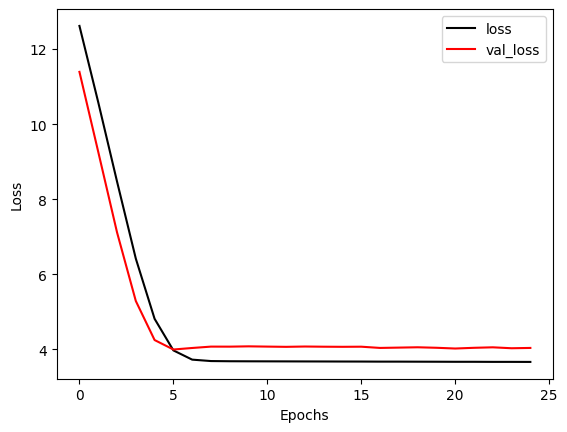

In [60]:
plt.plot(range(0,25), history.history['loss'], c='k', label = "loss")
plt.plot(range(0,25), history.history['val_loss'], c='r', label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [61]:
# to predict, use predict call
predictions = model.predict(
    x=X_test,
)

244/244 [==============================] - 1s 2ms/step


In [277]:
predictions.shape[0]

7788

In [278]:
X_test.shape

(7788, 3)

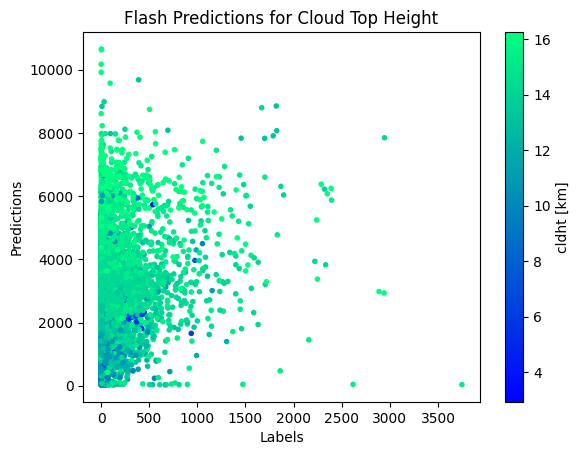

In [73]:
plt.scatter(y_test, predictions, c=X_test[:,2], cmap='winter', marker=".")
plt.xlabel('Labels')
plt.ylabel('Predictions')
plt.title('Flash Predictions for Cloud Top Height')
plt.colorbar(label='cldht [km]')
plt.show()

In [72]:
# MSE
# np.mean(square(y_true - y_pred))
np.mean(np.square(y_train - predictions))

7809419.0

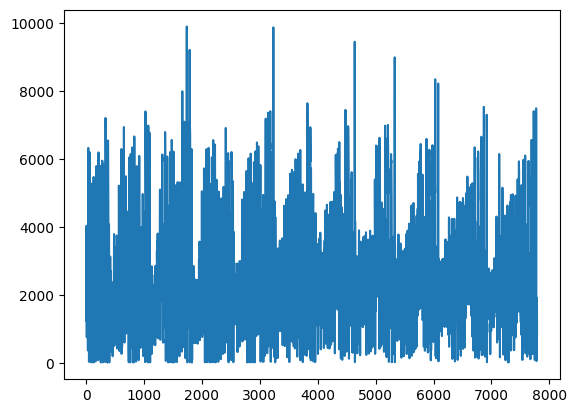

In [73]:
plt.plot(predictions)

In [211]:
predictions.shape

(7788, 1)

In [219]:
predictions[X_datetime_test==np.datetime64('2019-07-29T05:00:00.000000000')]

array([[1522.3132 ],
       [1698.7833 ],
       [1892.8044 ],
       [2067.1162 ],
       [2147.92   ],
       [ 894.516  ],
       [1093.1399 ],
       [1119.1934 ],
       [1249.1908 ],
       [1330.8162 ],
       [1528.1877 ],
       [1825.078  ],
       [1187.9159 ],
       [1145.9642 ],
       [1101.4991 ],
       [1124.1248 ],
       [1137.5234 ],
       [1394.7224 ],
       [1062.0934 ],
       [1104.8606 ],
       [ 999.7254 ],
       [ 987.828  ],
       [1003.45825],
       [1064.9425 ],
       [1258.9489 ],
       [ 749.3522 ],
       [ 807.2086 ],
       [ 883.5097 ],
       [ 903.05707],
       [1038.3507 ],
       [1052.9438 ],
       [1109.3986 ],
       [ 716.41766],
       [ 799.96063],
       [ 846.716  ],
       [ 884.6302 ],
       [ 950.87384],
       [ 809.70325],
       [ 922.9182 ],
       [ 960.9214 ],
       [1054.8    ],
       [1078.8136 ],
       [1280.1212 ],
       [ 841.9757 ],
       [1563.0709 ],
       [ 875.22217]], dtype=float32)

In [218]:
X_datetime_test[X_datetime_test==np.datetime64('2019-07-29T05:00:00.000000000')]

array(['2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29T05:00:00.000000000',
       '2019-07-29T05:00:00.000000000', '2019-07-29

In [ ]:
pd.date_range()

In [222]:
np.unique(X_datetime_test)

array(['2019-07-01T01:00:00.000000000', '2019-07-01T02:00:00.000000000',
       '2019-07-01T03:00:00.000000000', '2019-07-01T04:00:00.000000000',
       '2019-07-01T05:00:00.000000000', '2019-07-01T06:00:00.000000000',
       '2019-07-01T07:00:00.000000000', '2019-07-01T08:00:00.000000000',
       '2019-07-01T09:00:00.000000000', '2019-07-01T10:00:00.000000000',
       '2019-07-01T11:00:00.000000000', '2019-07-01T12:00:00.000000000',
       '2019-07-01T14:00:00.000000000', '2019-07-01T15:00:00.000000000',
       '2019-07-01T16:00:00.000000000', '2019-07-01T17:00:00.000000000',
       '2019-07-01T18:00:00.000000000', '2019-07-01T19:00:00.000000000',
       '2019-07-01T20:00:00.000000000', '2019-07-01T21:00:00.000000000',
       '2019-07-01T22:00:00.000000000', '2019-07-01T23:00:00.000000000',
       '2019-07-02T00:00:00.000000000', '2019-07-02T01:00:00.000000000',
       '2019-07-02T02:00:00.000000000', '2019-07-02T03:00:00.000000000',
       '2019-07-02T04:00:00.000000000', '2019-07-02